In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('data/heart.csv.xls')

In [4]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [5]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1020     True
1021     True
1022     True
1023     True
1024     True
Length: 1025, dtype: bool

In [6]:
data.drop_duplicates(inplace=True)

In [7]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [8]:
data.target.value_counts().tolist()

[164, 138]

<AxesSubplot:xlabel='target', ylabel='count'>

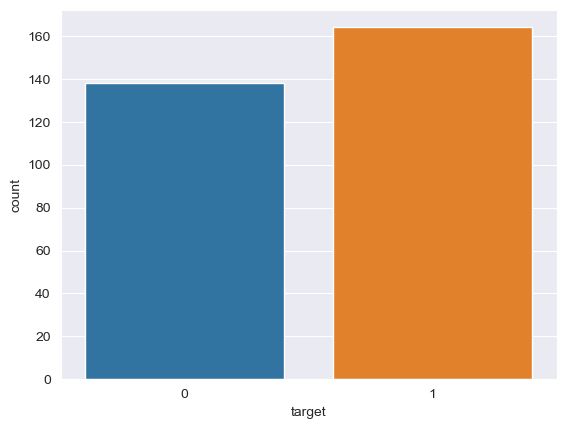

In [9]:
sns.countplot(x=data.target)

In [10]:
X = data.iloc[:,:-1].values
y = data.target.values

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train,y_train)

LogisticRegression()

In [14]:
y_pred = clf.predict(X_test)

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, auc
acc = accuracy_score(y_test,y_pred)
confusion_matrix = confusion_matrix(y_test,y_pred)
pre_score = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [16]:
confusion_matrix

array([[24,  5],
       [ 7, 40]], dtype=int64)

In [17]:
acc

0.8421052631578947

In [18]:
pre_score

0.8888888888888888

In [19]:
recall

0.851063829787234

In [20]:
f1

0.8695652173913044

In [21]:
dataset = pd.read_csv('data/diabetes.csv')

In [22]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [23]:
dataset.duplicated().sum()

0

In [24]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [25]:
X = dataset.iloc[:,:-1].values
y = dataset.Outcome.values

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [27]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [28]:
clf.fit(X_train,y_train)

LogisticRegression()

In [29]:
y_pred = clf.predict(X_test)

In [30]:
dataset.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [31]:
acc = accuracy_score(y_test,y_pred)
pre_score = precision_score(y_test.tolist(),y_pred.tolist())
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [32]:
f1

0.6666666666666666

In [33]:
confusion_matrix

array([[24,  5],
       [ 7, 40]], dtype=int64)

In [34]:
df = pd.read_csv('data/BRCA.csv.xls')

In [35]:
df

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
df.drop('Patient_ID', inplace=True, axis=1)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 334 non-null    float64
 1   Gender              334 non-null    object 
 2   Protein1            334 non-null    float64
 3   Protein2            334 non-null    float64
 4   Protein3            334 non-null    float64
 5   Protein4            334 non-null    float64
 6   Tumour_Stage        334 non-null    object 
 7   Histology           334 non-null    object 
 8   ER status           334 non-null    object 
 9   PR status           334 non-null    object 
 10  HER2 status         334 non-null    object 
 11  Surgery_type        334 non-null    object 
 12  Date_of_Surgery     334 non-null    object 
 13  Date_of_Last_Visit  317 non-null    object 
 14  Patient_Status      321 non-null    object 
dtypes: float64(5), object(10)
memory usage: 40.1+ KB


In [38]:
df

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
df.Tumour_Stage.value_counts()

II     189
III     81
I       64
Name: Tumour_Stage, dtype: int64

In [40]:
df.Tumour_Stage.replace({'I':1, 'II':2, 'III':3}, inplace=True)

In [41]:
df.Tumour_Stage

0      3.0
1      2.0
2      3.0
3      2.0
4      2.0
      ... 
336    NaN
337    NaN
338    NaN
339    NaN
340    NaN
Name: Tumour_Stage, Length: 341, dtype: float64

In [42]:
df

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,3.0,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,2.0,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,3.0,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,2.0,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,2.0,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
df.isna().sum().sum()

135

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 334 non-null    float64
 1   Gender              334 non-null    object 
 2   Protein1            334 non-null    float64
 3   Protein2            334 non-null    float64
 4   Protein3            334 non-null    float64
 5   Protein4            334 non-null    float64
 6   Tumour_Stage        334 non-null    float64
 7   Histology           334 non-null    object 
 8   ER status           334 non-null    object 
 9   PR status           334 non-null    object 
 10  HER2 status         334 non-null    object 
 11  Surgery_type        334 non-null    object 
 12  Date_of_Surgery     334 non-null    object 
 13  Date_of_Last_Visit  317 non-null    object 
 14  Patient_Status      321 non-null    object 
dtypes: float64(6), object(9)
memory usage: 40.1+ KB


In [45]:
df.drop([335,336,337,338,339,340],inplace=True)

In [46]:
df

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,3.0,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,2.0,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,3.0,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,2.0,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,2.0,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,44.0,MALE,0.732720,1.11170,-0.26952,-0.354920,2.0,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Other,01-Nov-19,04-Mar-20,Dead
331,61.0,FEMALE,-0.719470,2.54850,-0.15024,0.339680,2.0,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,11-Nov-19,18-Jan-21,Dead
332,79.0,FEMALE,0.479400,2.05590,-0.53136,-0.188480,1.0,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,21-Nov-19,19-Feb-21,Dead
333,76.0,FEMALE,-0.244270,0.92556,-0.41823,-0.067848,1.0,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,11-Nov-19,05-Jan-21,Dead


In [47]:
(df.Patient_Status.isna()).index

RangeIndex(start=0, stop=335, step=1)

In [48]:
print(type(df.Patient_Status[7]))

<class 'float'>


In [49]:
df.drop([7,22,99,111,182,196,206,219,221,285,286,305,321],inplace=True)

In [50]:
df

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,3.0,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,2.0,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,3.0,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,2.0,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,2.0,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,44.0,MALE,0.732720,1.11170,-0.26952,-0.354920,2.0,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Other,01-Nov-19,04-Mar-20,Dead
331,61.0,FEMALE,-0.719470,2.54850,-0.15024,0.339680,2.0,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,11-Nov-19,18-Jan-21,Dead
332,79.0,FEMALE,0.479400,2.05590,-0.53136,-0.188480,1.0,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,21-Nov-19,19-Feb-21,Dead
333,76.0,FEMALE,-0.244270,0.92556,-0.41823,-0.067848,1.0,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,11-Nov-19,05-Jan-21,Dead


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 322 entries, 0 to 334
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 321 non-null    float64
 1   Gender              321 non-null    object 
 2   Protein1            321 non-null    float64
 3   Protein2            321 non-null    float64
 4   Protein3            321 non-null    float64
 5   Protein4            321 non-null    float64
 6   Tumour_Stage        321 non-null    float64
 7   Histology           321 non-null    object 
 8   ER status           321 non-null    object 
 9   PR status           321 non-null    object 
 10  HER2 status         321 non-null    object 
 11  Surgery_type        321 non-null    object 
 12  Date_of_Surgery     321 non-null    object 
 13  Date_of_Last_Visit  317 non-null    object 
 14  Patient_Status      321 non-null    object 
dtypes: float64(6), object(9)
memory usage: 40.2+ KB


In [52]:
df.Date_of_Last_Visit.isna()

0      False
1      False
2      False
3      False
4      False
       ...  
330    False
331    False
332    False
333    False
334     True
Name: Date_of_Last_Visit, Length: 322, dtype: bool

In [53]:
df.drop([189,265,170,283],inplace=True)

In [54]:
df.Date_of_Last_Visit.isna().sum()

1

In [55]:
df.isna().sum().sum()

15

In [56]:
df.drop([334],inplace=True)

In [57]:
df

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,3.0,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,2.0,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,3.0,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,2.0,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,2.0,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,36.0,FEMALE,0.231800,0.61804,-0.55779,-0.517350,3.0,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Simple Mastectomy,11-Nov-19,09-Feb-20,Dead
330,44.0,MALE,0.732720,1.11170,-0.26952,-0.354920,2.0,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Other,01-Nov-19,04-Mar-20,Dead
331,61.0,FEMALE,-0.719470,2.54850,-0.15024,0.339680,2.0,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,11-Nov-19,18-Jan-21,Dead
332,79.0,FEMALE,0.479400,2.05590,-0.53136,-0.188480,1.0,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,21-Nov-19,19-Feb-21,Dead


In [58]:
ms = []
for i in df.Date_of_Surgery:
    x = i.split('-')
    ms.append(x)

In [59]:
ms

[['15', 'Jan', '17'],
 ['26', 'Apr', '17'],
 ['08', 'Sep', '17'],
 ['25', 'Jan', '17'],
 ['06', 'May', '17'],
 ['18', 'Sep', '17'],
 ['04', 'Feb', '17'],
 ['28', 'Sep', '17'],
 ['14', 'Feb', '17'],
 ['26', 'May', '17'],
 ['08', 'Oct', '17'],
 ['24', 'Feb', '17'],
 ['05', 'Jun', '17'],
 ['18', 'Oct', '17'],
 ['06', 'Mar', '17'],
 ['15', 'Jun', '17'],
 ['28', 'Oct', '17'],
 ['16', 'Mar', '17'],
 ['25', 'Jun', '17'],
 ['07', 'Nov', '17'],
 ['26', 'Mar', '17'],
 ['17', 'Nov', '17'],
 ['05', 'Apr', '17'],
 ['17', 'Nov', '17'],
 ['27', 'Nov', '17'],
 ['15', 'Apr', '17'],
 ['27', 'Nov', '17'],
 ['07', 'Dec', '17'],
 ['25', 'Apr', '17'],
 ['07', 'Dec', '17'],
 ['17', 'Dec', '17'],
 ['05', 'May', '17'],
 ['17', 'Dec', '17'],
 ['27', 'Dec', '17'],
 ['15', 'May', '17'],
 ['27', 'Dec', '17'],
 ['06', 'Jan', '18'],
 ['25', 'May', '17'],
 ['06', 'Jan', '18'],
 ['16', 'Jan', '18'],
 ['04', 'Jun', '17'],
 ['16', 'Jan', '18'],
 ['26', 'Jan', '18'],
 ['14', 'Jun', '17'],
 ['26', 'Jan', '18'],
 ['05', 'F

In [60]:
date_surge = pd.DataFrame(ms, columns = ['day', 'month', 'year'])

In [61]:
df.drop(['Date_of_Surgery'],inplace=True,axis=1)

In [62]:
df

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Last_Visit,Patient_Status
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,3.0,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,19-Jun-17,Alive
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,2.0,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,09-Nov-18,Dead
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,3.0,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,09-Jun-18,Alive
3,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,2.0,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,12-Jul-17,Alive
4,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,2.0,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,27-Jun-19,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,36.0,FEMALE,0.231800,0.61804,-0.55779,-0.517350,3.0,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Simple Mastectomy,09-Feb-20,Dead
330,44.0,MALE,0.732720,1.11170,-0.26952,-0.354920,2.0,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Other,04-Mar-20,Dead
331,61.0,FEMALE,-0.719470,2.54850,-0.15024,0.339680,2.0,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,18-Jan-21,Dead
332,79.0,FEMALE,0.479400,2.05590,-0.53136,-0.188480,1.0,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,19-Feb-21,Dead


In [63]:
df = pd.concat([df,date_surge],axis=1)
df

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Last_Visit,Patient_Status,day,month,year
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,3.0,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,19-Jun-17,Alive,15,Jan,17
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,2.0,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,09-Nov-18,Dead,26,Apr,17
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,3.0,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,09-Jun-18,Alive,08,Sep,17
3,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,2.0,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,12-Jul-17,Alive,25,Jan,17
4,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,2.0,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,27-Jun-19,Dead,06,May,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,May,19
283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,Jul,19
285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,Jul,19
286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,03,Aug,19


In [64]:
last_visit = []
for i in df.Date_of_Last_Visit:
    h = i.split('-')
    last_visit.append(h)

AttributeError: 'float' object has no attribute 'split'

In [ ]:
for i in df['Date_of_last_visit']:
    if type(i) == float:
        print(i)

In [ ]:
df